In [1]:
import pandas as pd

df = pd.read_csv('labeled_phone_messages.csv')

print(df.head())

  ID                                             Source  \
0  0  https://www.youtube.com/watch?v=UG-KjCSt14k&ab...   
1  1  https://www.patreon.com/JimBrowning/posts?filt...   
2  2  https://www.youtube.com/watch?v=P6dhteJIY48&ab...   
3  3  https://www.youtube.com/watch?v=HlTpousFPsM&ab...   
4  4  https://www.youtube.com/watch?v=8sT121uUFOo&ab...   

                                             Content  Char_Len label  
0  hi yeah I've got an email here about a laptop ...       224  scam  
1  Hello This is British Telecom technical depart...       398  scam  
2  hello this call is from Interpol the purpose o...       186  scam  
3  hi this is from Amazon customer service we hav...       361  scam  
4  this is calling with the vehicle service depar...       411  scam  


In [2]:
print(df.isnull().sum())


ID          0
Source      0
Content     0
Char_Len    0
label       0
dtype: int64


In [3]:
print(df['label'].value_counts())

label
scam        543
non_scam    500
Name: count, dtype: int64


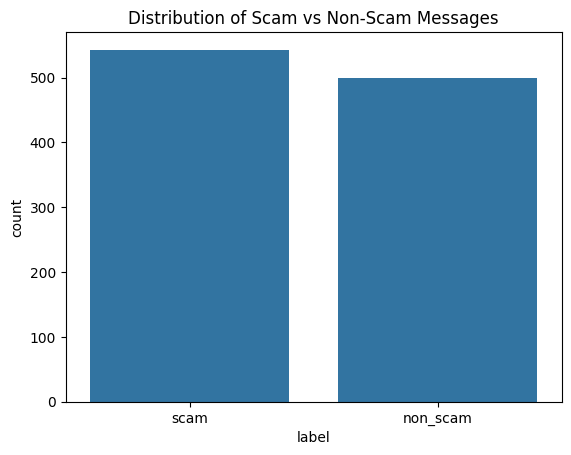

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Distribution of Scam vs Non-Scam Messages')
plt.show()


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data if not already done
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = text.split()
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    # Stemming or Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Rejoin words
    return ' '.join(words)

# Apply preprocessing
df['clean_content'] = df['Content'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xxxxx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xxxxx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df.to_csv('preprocessed_dataset.csv', index=False)